In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')
encoder = LabelEncoder()
OHE = OneHotEncoder(sparse=False)

In [2]:
#Data processing and understanding the data

In [3]:
data = pd.read_csv('C:\\Users\\Mubarik\\Desktop\\class_files\\hotel_bookings.csv', low_memory=False)


In [4]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
#checking the shape
data.shape

(119390, 32)

In [6]:
#checking the data information
#data.info()

In [7]:
#View profife report
from pandas_profiling import ProfileReport

In [8]:
#ProfileReport(data)

In [9]:
#checking and handling missing values
handle_missing_values = data.isnull().sum()
#handle_missing_values

In [10]:
#Checking the percentage of missing values
percentage_missing_values_agent = data.agent.isnull().sum() / data.agent.shape[0]
percentage_missing_values_country = data.country.isnull().sum() / data.country.shape[0]
percentage_missing_values_company = data.company.isnull().sum() / data.company.shape[0]
print(percentage_missing_values_agent, percentage_missing_values_country, percentage_missing_values_company)

0.13686238378423654 0.004087444509590418 0.943068933746545


In [11]:
data.country.value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DMA        1
NPL        1
NIC        1
BHS        1
SDN        1
Name: country, Length: 177, dtype: int64

In [12]:
numericals = data.select_dtypes(include=np.number)
categoricals = data.select_dtypes(include=np.object)

In [13]:
numericals.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [14]:
categoricals.columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

In [15]:
#Cancelled bookinks as the target variable. Checking value count
data.is_canceled.value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [16]:
#Changed 0,1 to yes and no
#data['is_canceled'] = data['is_canceled'].map({ 0 : 'no', 1 : 'yes'})

<AxesSubplot:xlabel='hotel', ylabel='count'>

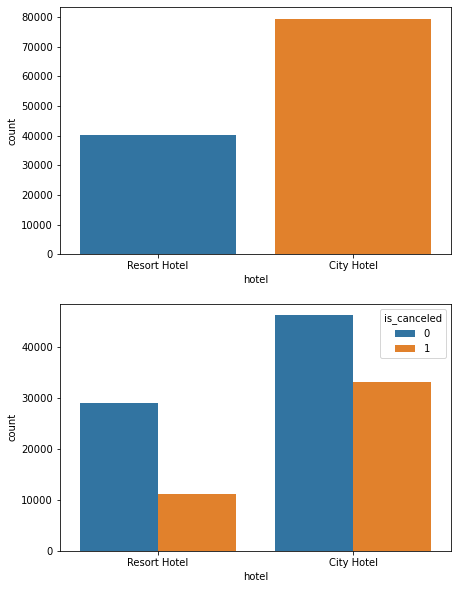

In [17]:
fig, ax = plt.subplots(2,1, figsize=(7,10))
sns.countplot(data['hotel'], ax=ax[0])
sns.countplot(data['hotel'], hue=data['is_canceled'], ax=ax[1])

In [18]:
def my_heatMap(data):
    correlations_matrix = data.corr()
    mask = np.zeros_like(correlations_matrix)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(25, 10))
    ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
    plt.show()


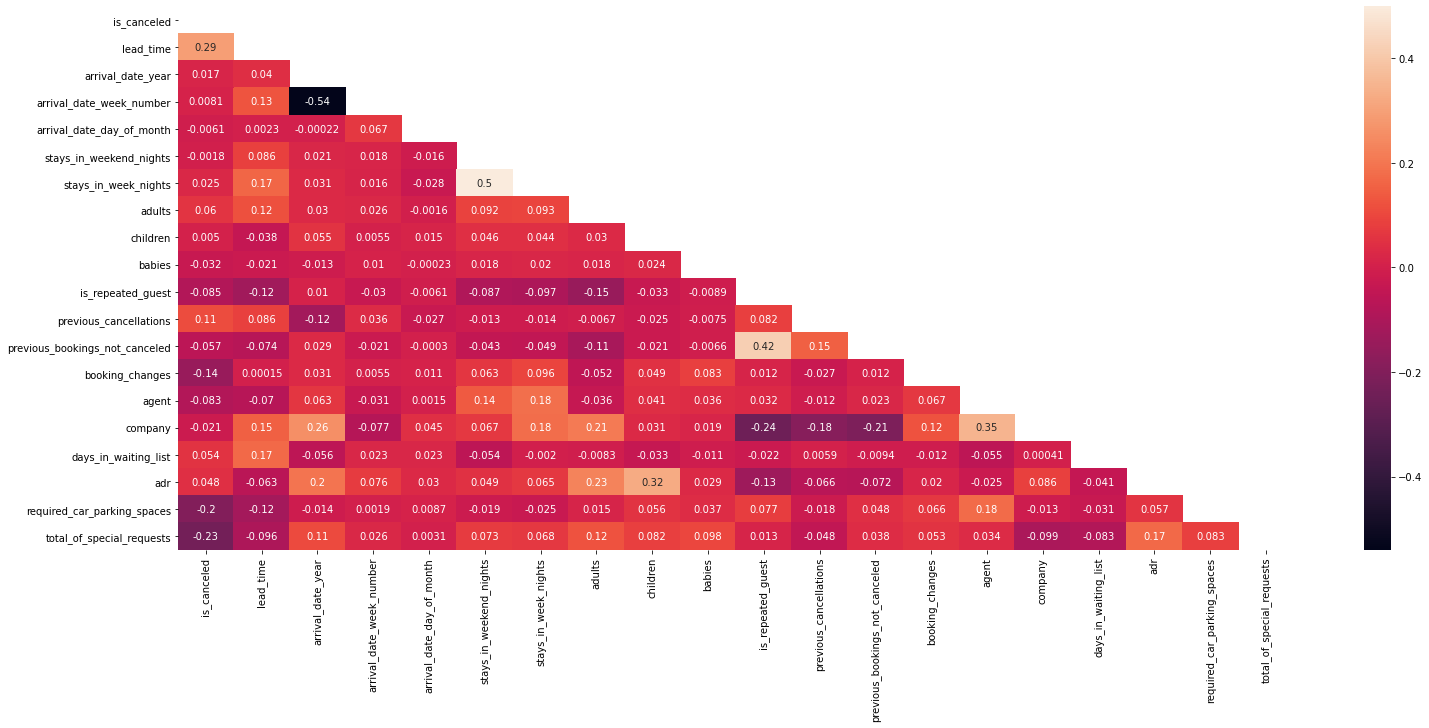

In [19]:
#ax, fig = plt.subplots(figsize=(12,6))
#sns.heatmap(data.corr(), annot=True)
my_heatMap(numericals)

In [20]:
data[data.deposit_type == 'Non Refund'].is_canceled.value_counts()

1    14494
0       93
Name: is_canceled, dtype: int64

In [21]:
data.deposit_type.value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

In [22]:
#data.is_canceled.value_counts()

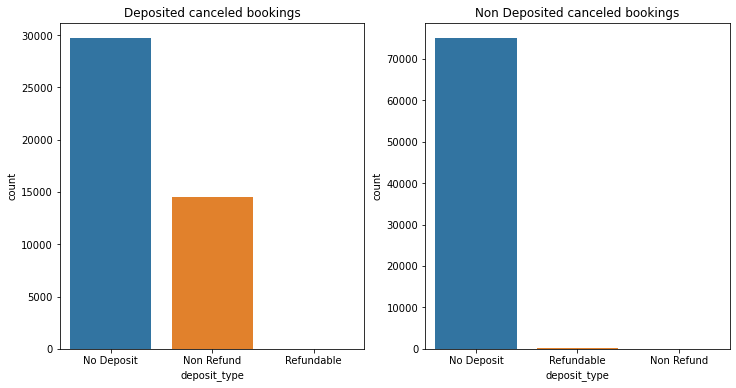

In [23]:
fig, ax= plt.subplots(1, 2, figsize=(12,6))
sns.countplot(ax = ax[0],  x='deposit_type', data=data [data.is_canceled == 1])
ax[1].set_title('Non Deposited canceled bookings')
sns.countplot(ax= ax[1],  x='deposit_type', data=data [data.is_canceled == 0])
#plt.ylabel('Deposited')
ax[0].set_title('Deposited canceled bookings')
plt.show()



In [24]:
#checking customer type and cancelation

In [25]:
data.customer_type.value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

In [26]:
 Transient = data[data['customer_type'] == 'Transient'][data['is_canceled'] == 1]
Transient.shape

(36514, 32)

In [27]:
Transient_party = data[data['customer_type'] == 'Transient-Party'][data['is_canceled'] == 1]

In [28]:
Transient_party.shape

(6389, 32)

In [29]:
Contract = data[data['customer_type'] == 'Contract'][data['is_canceled'] == 1]

In [30]:
Contract.shape

(1262, 32)

In [31]:
Group = data[data['customer_type'] == 'CGroup'][data['is_canceled'] == 1]

In [32]:
Group.shape

(0, 32)

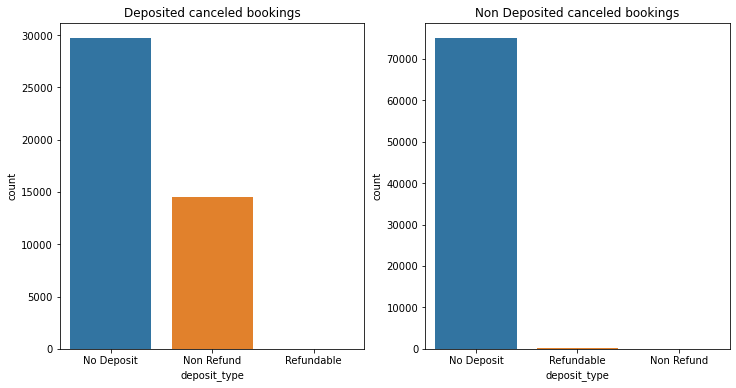

In [33]:
#Non refundable bookings still recording highest amount of cancelations. 
fig, ax= plt.subplots(1, 2, figsize=(12,6))
sns.countplot(ax = ax[0],  x='deposit_type', data=data [data.is_canceled == 1])
ax[1].set_title('Non Deposited canceled bookings')
sns.countplot(ax= ax[1],  x='deposit_type', data=data [data.is_canceled == 0])
#plt.ylabel('Deposited')
ax[0].set_title('Deposited canceled bookings')
plt.show()


Text(0.5, 1.0, 'Customer type who cancel booking')

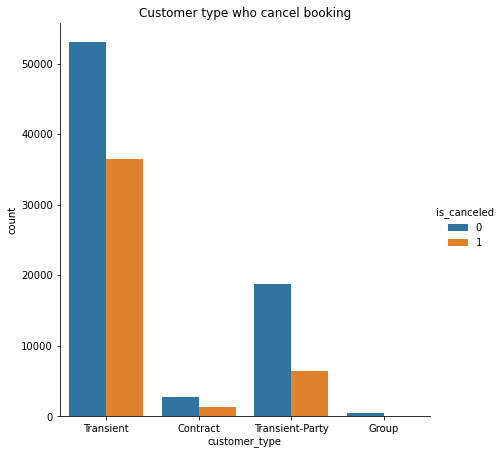

In [34]:
sns.catplot(data=data,x='customer_type',hue='is_canceled',kind='count',height=6)
plt.title ('Customer type who cancel booking')

In [35]:
data['arrival_date_month'] = data['arrival_date_month'].astype('object')

Text(0.5, 1.0, 'Cancelation in different months of the year')

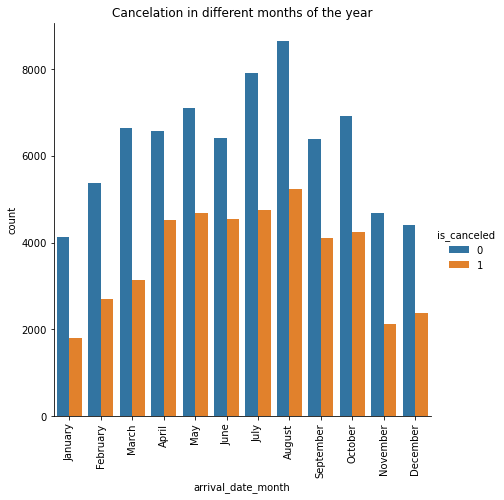

In [36]:
#odering months
list_ordering = ['January','February','March','April','May','June','July','August','September','October','November','December']  
data["arrival_date_month"] = pd.Categorical(data["arrival_date_month"], categories=list_ordering) 
sns.catplot(data=data,x='arrival_date_month',hue='is_canceled',kind='count',height=6)
plt.xticks(rotation=90)
plt.title('Cancelation in different months of the year')

Handling missing values

In [133]:
data.isnull().sum().sort_values(ascending=False)[:10]

company                     112593
agent                        16340
country                        488
children                         4
lead_time                        0
arrival_date_year                0
arrival_date_month               0
arrival_date_week_number         0
is_canceled                      0
market_segment                   0
dtype: int64

In [38]:
data.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01


In [39]:
#drop_list = handle_missing_values[handle_missing_values > (0.6*(data.hotel.shape[0]))]
#data.hotel.drop(company_column,axis = 1,inplace=True)
#columns_above_threshold = nulls_percent_df[nulls_percent_df['nulls_percentage'] > 0.25]['column_name']
data_clean = data.drop(columns=['agent', 'company'])

In [40]:
data_clean['country'].fillna(method='ffill',inplace=True)
data_clean['children'].fillna(method='ffill',inplace=True)
#data.transform(lambda x: x.fillna('') if x.dtype == 'object' else x.fillna(0))

In [130]:
data_clean.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [42]:
data_clean.dtypes


hotel                               object
is_canceled                          int64
lead_time                            int64
arrival_date_year                    int64
arrival_date_month                category
arrival_date_week_number             int64
arrival_date_day_of_month            int64
stays_in_weekend_nights              int64
stays_in_week_nights                 int64
adults                               int64
children                           float64
babies                               int64
meal                                object
country                             object
market_segment                      object
distribution_channel                object
is_repeated_guest                    int64
previous_cancellations               int64
previous_bookings_not_canceled       int64
reserved_room_type                  object
assigned_room_type                  object
booking_changes                      int64
deposit_type                        object
days_in_wai

In [43]:
# convert the children data type to int64
data_clean['children'] = data_clean['children'].astype('int')


In [44]:
#data_clean.dtypes

In [45]:
data_clean.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [46]:
#data.arrival_date_month.value_counts()

In [47]:
#data.arrival_date_year.value_counts()

In [48]:
#data.arrival_date_day_of_month.value_counts()

In [49]:
le = LabelEncoder()
data_clean[data_clean.select_dtypes(include = ['object']).columns] = data_clean[data_clean.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [50]:
data_clean.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,July,27,1,0,0,2,...,2,3,0,0,2,0.0,0,0,1,121
1,1,0,737,2015,July,27,1,0,0,2,...,2,4,0,0,2,0.0,0,0,1,121
2,1,0,7,2015,July,27,1,0,1,1,...,2,0,0,0,2,75.0,0,0,1,122
3,1,0,13,2015,July,27,1,0,1,1,...,0,0,0,0,2,75.0,0,0,1,122
4,1,0,14,2015,July,27,1,0,2,2,...,0,0,0,0,2,98.0,0,1,1,123


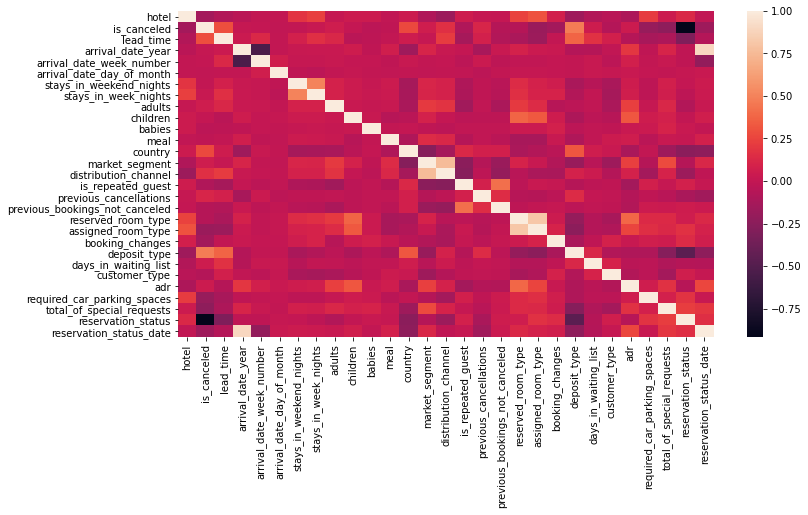

In [51]:

plt.figure(figsize = (12,6))
ax = sns.heatmap(data_clean.corr())

In [52]:
#Testing models

In [54]:
data_clean_x = data_clean.drop('is_canceled' , axis =1)
data_clean_y = data_clean['is_canceled']

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
data_clean_x_train, data_clean_x_test, data_clean_y_train, data_clean_y_test = train_test_split(data_clean_x,data_clean_y, random_state=11)

In [57]:
data_clean.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,July,27,1,0,0,2,...,2,3,0,0,2,0.0,0,0,1,121
1,1,0,737,2015,July,27,1,0,0,2,...,2,4,0,0,2,0.0,0,0,1,121
2,1,0,7,2015,July,27,1,0,1,1,...,2,0,0,0,2,75.0,0,0,1,122
3,1,0,13,2015,July,27,1,0,1,1,...,0,0,0,0,2,75.0,0,0,1,122
4,1,0,14,2015,July,27,1,0,2,2,...,0,0,0,0,2,98.0,0,1,1,123


In [136]:
#checking column relationships
#for col in data_clean.columns:
    #sns.histplot(data_clean[col], bins=100)
    #plt.show()
    

In [59]:
data_clean["lead_time"].describe()

count    119390.000000
mean        104.011416
std         106.863097
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64

In [60]:
#data_clean.dtypes

In [139]:
#check cat correlation
from scipy.stats import chi2_contingency

In [140]:
#function to check chi squared value for all pairs of columns in a dataframe
def chi2_check (data):
    lst1 = []
    lst2 = []
    lst3 = []
    for i,n in enumerate(data.columns):
        x = 1
        while x < len(data.columns)-i: 
            crosstab = pd.crosstab(data[n],data[data.columns[i+x]])
            lst1.append(n)
            lst2.append(data.columns[i+x])
            lst3.append(chi2_contingency(crosstab, correction=False)[1])
            x += 1
    df = pd.concat([pd.DataFrame(lst1),pd.DataFrame(lst2),pd.DataFrame(lst3)], axis =1)
    return df

In [141]:
chi2_check = chi2_check(data_clean)

In [142]:
chi2_check[chi2_check.iloc[:,0]=="is_canceled"]

,0,0,0
29,is_canceled,lead_time,0.000000e+00
30,is_canceled,arrival_date_year,1.883818e-18
31,is_canceled,arrival_date_month,3.671823e-119
32,is_canceled,arrival_date_week_number,1.362291e-202
33,is_canceled,arrival_date_day_of_month,7.233902e-51
34,is_canceled,stays_in_weekend_nights,7.859708e-16
35,is_canceled,stays_in_week_nights,0.000000e+00
36,is_canceled,adults,1.412498e-184
37,is_canceled,children,1.976475e-20
38,is_canceled,babies,1.772454e-29


In [144]:
#chi2_check

In [67]:
#rf.fit(data_clean_x_train,data_clean_y_train)

In [145]:
#preparing our features for the model base on hitmap and chi2
data_clean.reset_index()
data_clean_cat=pd.get_dummies(data_clean[['hotel','meal','is_repeated_guest','market_segment','customer_type','arrival_date_week_number','reserved_room_type']])
data_clean_num= data_clean[['adults','previous_cancellations','lead_time']]
X=data_clean_cat.join(data_clean_num,how='inner')
y=data_clean.is_canceled

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100, stratify = y)

In [147]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks()
X_tl, y_tl = tl.fit_sample(X_train, y_train)

In [148]:
y_train.value_counts()

0    45100
1    26534
Name: is_canceled, dtype: int64

In [149]:
y_tl.value_counts()

0    43177
1    26534
Name: is_canceled, dtype: int64

In [150]:
#name variables
from imblearn.over_sampling import SMOTE
smote = SMOTE()

X_sm_train, y_sm_train = smote.fit_sample(X_tl, y_tl)
y_sm_train.value_counts()

1    43177
0    43177
Name: is_canceled, dtype: int64

In [151]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_sm_train, y_sm_train)

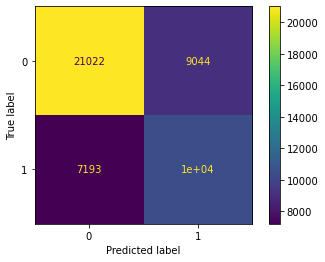

In [152]:
#confusion matrix
from sklearn.metrics import plot_confusion_matrix, f1_score, precision_score, recall_score,accuracy_score
plot_confusion_matrix(classification, X_test, y_test)

In [153]:
#precision score
precision_score(y_test, classification.predict(X_test))

0.5371782406222814

In [154]:
#recall
recall_score(y_test, classification.predict(X_test))

0.5933860938383267

In [155]:
f1_score(y_test, classification.predict(X_test))

0.5638849345975128

In [156]:
accuracy_score(y_test, classification.predict(X_test))

0.6600008375910881

In [157]:
classification.score(X_test, y_test)

0.6600008375910881

In [158]:
#X_pred=model.predict(X_test)
#confusion_matrix(y_pred, y_test)

In [159]:
#g = sns.PairGrid(data_clean[['is_canceled','lead_time','distribution_channel','deposit_type','previous_cancellations','adr','arrival_date_day_of_month']])
#g.map(sns.scatterplot,alpha=.5)

In [160]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Normalizer

In [161]:

transformer = Normalizer().fit(X)
x_normalized = transformer.transform(X)
x = pd.DataFrame(x_normalized)

In [162]:
#Feature selection

In [163]:
from sklearn.feature_selection import RFE
# change this to a classifier, since we're predicting a categorical variable. Or use logistic regression.
log = LogisticRegression()
rfe = RFE(log, n_features_to_select=10, verbose=False)
rfe.fit(X_sm_train, y_sm_train)
# After we run the algorithm, it labels the top features as 1 and the rest are
# marked in an increasing order of importance.
df = pd.DataFrame(data = rfe.ranking_, columns=['Rank'])
df['Column_name'] = X_sm_train.columns
df[df['Rank']==1]


,Rank,Column_name
0,1,hotel
1,1,meal
2,1,is_repeated_guest
3,1,market_segment
4,1,customer_type
5,1,arrival_date_week_number
6,1,reserved_room_type
7,1,adults
8,1,previous_cancellations
9,1,lead_time


In [164]:
df

,Rank,Column_name
0,1,hotel
1,1,meal
2,1,is_repeated_guest
3,1,market_segment
4,1,customer_type
5,1,arrival_date_week_number
6,1,reserved_room_type
7,1,adults
8,1,previous_cancellations
9,1,lead_time


In [165]:
categoricals.columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

In [166]:
numericals.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [167]:
X_train_reduced = X_sm_train[list(df[df['Rank']==1]['Column_name'])]

In [91]:
X_train_reduced

,hotel,meal,is_repeated_guest,market_segment,customer_type,arrival_date_week_number,reserved_room_type,adults,previous_cancellations,lead_time
0,0,0,0,5,3,42,0,2,0,37
1,1,2,0,6,2,24,7,3,0,249
2,1,0,0,3,2,34,3,2,0,148
3,0,0,0,4,2,39,0,2,1,342
4,1,0,0,4,3,22,0,2,0,224
...,...,...,...,...,...,...,...,...,...,...
86349,0,3,0,6,2,15,0,2,0,52
86350,0,0,0,5,2,13,0,2,0,96
86351,0,3,0,6,2,39,0,2,0,26
86352,0,0,0,5,3,26,0,1,0,172


In [92]:
from sklearn.metrics import plot_confusion_matrix, f1_score
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_train_reduced, y_sm_train)

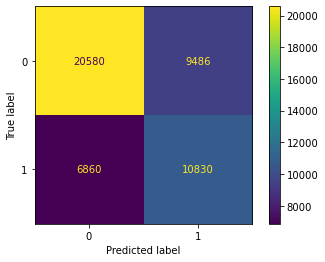

In [93]:

plot_confusion_matrix(classification, X_test[list(df[df['Rank']==1]['Column_name'])], y_test)

In [94]:
#f1_score(y_test, classification.predict(X_test[list(df[df['Rank']==1]['Column_name'])]))

In [95]:
#precision_score(y_test, classification.predict(X_test[list(df[df['Rank']==1]['Column_name'])]))

In [96]:
#recall_score(y_test, classification.predict(X_test[list(df[df['Rank']==1]['Column_name'])]))

In [97]:
accuracy_score(y_test, classification.predict(X_test[list(df[df['Rank']==1]['Column_name'])]))

0.657718401876204

In [98]:
#Random Forest model
model_forest = RandomForestClassifier()
model_forest.fit(X_train, y_train)

RandomForestClassifier()

In [99]:

y_predicted_forest = model_forest.predict(X_test)

In [100]:
model_forest.feature_importances_

array([0.01694934, 0.02177305, 0.00515112, 0.09419102, 0.06160586,
       0.23344936, 0.03562264, 0.02471034, 0.07178841, 0.43475886])

In [101]:
accuracy_score(y_test, model_forest.predict(X_test[list(df[df['Rank']==1]['Column_name'])]))
#model_forest.score(X_test, y_test)

0.7921936510595528

In [102]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [103]:
y_predicted_tree = model_tree.predict(X_test)

In [104]:

accuracy_score(y_test, model_tree.predict(X_test[list(df[df['Rank']==1]['Column_name'])]))

0.7750858530865231

In [120]:
# Confusion matrix
#from sklearn.metrics import confusion_matrix

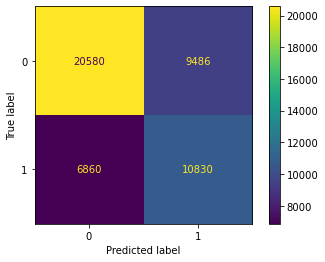

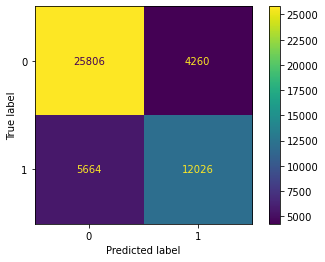

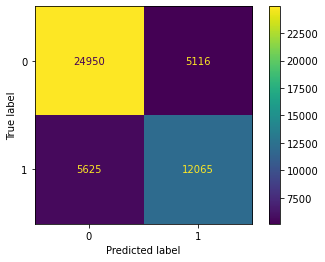

In [121]:
from sklearn.metrics import plot_confusion_matrix, f1_score
lg = plot_confusion_matrix(classification, X_test[list(df[df['Rank']==1]['Column_name'])], y_test, )
rd = plot_confusion_matrix(model_forest, X_test[list(df[df['Rank']==1]['Column_name'])], y_test)
dc = plot_confusion_matrix(model_tree, X_test[list(df[df['Rank']==1]['Column_name'])], y_test)


In [108]:

def plot_cm(x, title):
    plt.imshow(x, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title(title)
    plt.ylabel('True')
    plt.xlabel('Predicted')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(x[i][j]))
    plt.show()
    pass

In [124]:
#type(rd)

In [123]:
#plot_cm(lg, 'Logistic Regression Confusion Matrix')
#plot_cm(rd, 'KNN Confusion Matrix')
#plot_cm(dc, 'Decision Tree Confusion Matrix')


In [125]:
from sklearn.metrics import roc_auc_score, roc_curve

In [126]:

probs_lr = classification.predict_proba(X_test)[:, 1]
probs_knn = model_forest.predict_proba(X_test)[:, 1]
probs_tree = model_tree.predict_proba(X_test)[:, 1]

In [127]:

auc_lr = roc_auc_score(y_test, probs_lr)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, probs_lr)

auc_knn = roc_auc_score(y_test, probs_knn)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, probs_knn)

auc_tree = roc_auc_score(y_test, probs_tree)
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, probs_tree)


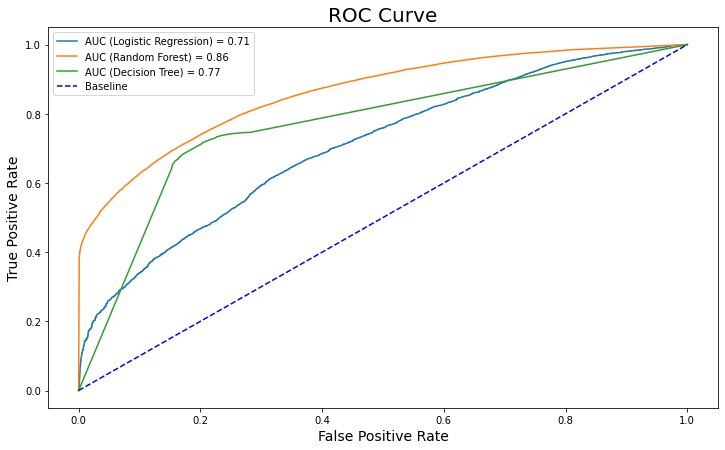

In [128]:
plt.figure(figsize=(12, 7))

plt.plot(fpr_lr, tpr_lr, label=f'AUC (Logistic Regression) = {auc_lr:.2f}')
plt.plot(fpr_knn, tpr_knn, label=f'AUC (Random Forest) = {auc_knn:.2f}')
plt.plot(fpr_tree, tpr_tree, label=f'AUC (Decision Tree) = {auc_tree:.2f}')


plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();